# Exploring Hacker News Posts

In this project, we'll compare two different types of posts from Hacker News, a popular site where technology related stories (or 'posts') are voted and commented upon. The two types of posts we'll explore begin with either Ask HN or Show HN.

Users submit Ask HN posts to ask the Hacker News community a specific question, such as "What is the best online course you've ever taken?" Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting.

We'll specifically compare these two types of posts to determine the following:

- Do Ask HN or Show HN receive more comments on average?
- Do posts created at a certain time receive more comments on average?

It should be noted that the data set we're working with was reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hacker_news.csv')
df.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [3]:
df.columns

Index(['id', 'title', 'url', 'num_points', 'num_comments', 'author',
       'created_at'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


# Data Wrangling

In [9]:
df['title'] = df['title'].str.lower()

In [10]:
df.created_at = pd.to_datetime(df['created_at'])

In [11]:
ask_posts = df[df.title.str.startswith('ask hn')]

In [12]:
show_posts = df[df.title.str.startswith('show hn')]

In [13]:
other_posts = df[~(df.title.str.startswith('ask hn') | df.title.str.startswith('show hn'))]

In [14]:
ask_posts.shape[0] + show_posts.shape[0] + other_posts.shape[0], df.shape[0]

(20100, 20100)

In [28]:
total_ask_comments = ask_posts.num_comments.values.sum()
avg_ask_comments = total_ask_comments/ask_posts.shape[0]
avg_ask_comments

14.038417431192661

In [29]:
total_show_comments = show_posts.num_comments.values.sum()
avg_show_comments = total_show_comments/show_posts.shape[0]
avg_show_comments

10.31669535283993

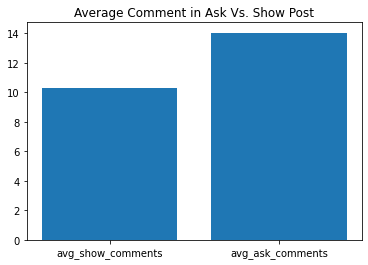

In [44]:
x = ['avg_show_comments', 'avg_ask_comments']
y = [10.31669535283993, 14.038417431192661]
plt.bar(x, y)
plt.title('Average Comment in Ask Vs. Show Post');

- From  the above we can See that ask posts usually have more comments than show posts which is quiet expected
- Going foward we'll focus on ask posts since they generally have more comments.

In [47]:
result_list = ask_posts[['created_at', 'num_comments']]
result_list.head()

,created_at,num_comments
7,2016-08-16 09:55:00,6
17,2015-11-22 13:43:00,29
22,2016-05-02 10:14:00,1
30,2016-08-02 14:20:00,3
31,2015-10-15 16:38:00,17


In [48]:
hours = list(result_list.created_at.dt.hour.values)
num_comments = list(result_list.num_comments.values)

In [49]:
new_list = [list(x) for x in zip(hours, num_comments)]

In [51]:
counts_by_hour = {}
comments_by_hour = {}

In [52]:
for hour, comment in new_list:
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comment
    else:
        counts_by_hour[hour]+=1
        comments_by_hour[hour]+=comment

In [54]:
avg_by_hour = []
for hour in comments_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour]/counts_by_hour[hour]])

In [55]:
avg_by_hour

[[9, 5.5777777777777775],
 [13, 14.741176470588234],
 [10, 13.440677966101696],
 [14, 13.233644859813085],
 [16, 16.796296296296298],
 [23, 7.985294117647059],
 [12, 9.41095890410959],
 [17, 11.46],
 [15, 38.5948275862069],
 [21, 16.009174311926607],
 [20, 21.525],
 [2, 23.810344827586206],
 [18, 13.20183486238532],
 [3, 7.796296296296297],
 [5, 10.08695652173913],
 [19, 10.8],
 [1, 11.383333333333333],
 [22, 6.746478873239437],
 [8, 10.25],
 [4, 7.170212765957447],
 [0, 8.127272727272727],
 [6, 9.022727272727273],
 [7, 7.852941176470588],
 [11, 11.051724137931034]]

In [56]:
avg_by_hour_df = pd.DataFrame(avg_by_hour, columns = ['hours', 'avg_num_comments'])

In [57]:
avg_by_hour_df.sort_values('avg_num_comments', ascending=False, inplace=True)

In [58]:
avg_by_hour_df.reset_index(drop=True, inplace=True)

In [59]:
avg_by_hour_df

,hours,avg_num_comments
0,15,38.594828
1,2,23.810345
2,20,21.525000
3,16,16.796296
4,21,16.009174
5,13,14.741176
6,10,13.440678
7,14,13.233645
8,18,13.201835
9,17,11.460000


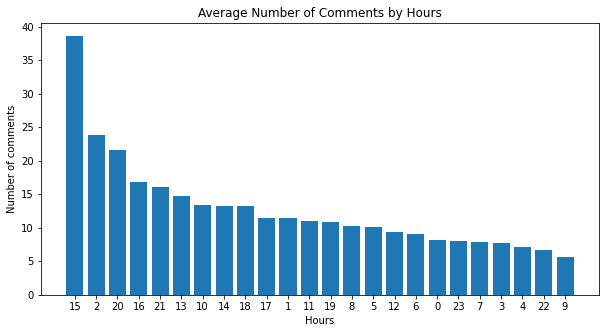

In [79]:
x = avg_by_hour_df['hours'].map(str)
y = avg_by_hour_df['avg_num_comments']
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel('Hours')
plt.ylabel('Number of comments')
plt.title('Average Number of Comments by Hours');

- The hour that receives the most comments per post on average is 15:00, with an average of 38.59 comments per post. There's about a 60% increase in the number of comments between the hours with the highest and second highest average number of comments.